In [8]:
from numpy.random import normal
import numpy as np
from numpy.linalg import inv

from scipy import *
from scipy.linalg import norm, pinv
 

from sympy import symbols, diff
import matplotlib.pyplot as plt



In [88]:
np.random.seed(0)

def radialbasisfunc(beta, c, d):
    return exp(-beta * norm(c-d)**2)
     
def activation(X, beta, numNeurons, centers):
    # calculate activations of RBFs
    G = zeros((X.shape[0], numNeurons), float)
    for ci, c in enumerate(centers):
        for xi, x in enumerate(X):
            G[xi,ci] = radialbasisfunc(beta, c, x)
    return G
     
def trainrbf(X, Y, beta, numNeurons):
    """ X: matrix of dimensions n x indim 
        y: column vector of dimension n x 1 """
         
    # choose random center vectors from training set
    
    #We permute randomly the centers indices
    rnd_idx = random.permutation(X.shape[0])[:numNeurons]
    
    #Centers contain all points X(1:rnd_idx) play the role of neurons
    centers = [X[i,:] for i in rnd_idx]
    
    print "center", centers
    
    # calculate activations of RBFs
    G = activation(X, beta, numNeurons, centers)
    G = np.append(G, X, axis =1)
    G = np.append(G, np.ones((n,1), "float"), axis = 1)
    
    print G.shape[1] 
    print G    
    # calculate output weights (pseudoinverse)
    W = dot(pinv(G), Y)
    
    L = [W, centers]
    
    return L
         
def testrbf(X, W, beta, numNeurons, centers):
    """ X: matrix of dimensions n x indim """
         
    G = activation(X, beta, numNeurons, centers)
    G = np.append(G, X, axis=1)
    G = np.append(G, np.ones((n,1), "float"), axis=1)
    Y = dot(G, W)
    return Y



center [array([-1.19238477]), array([-3.61723447]), array([ 3.29659319]), array([ 0.61122244]), array([-4.91983968]), array([ 4.23847695]), array([-4.67935872]), array([-1.95390782]), array([ 2.35470942]), array([ 1.13226453]), array([ 0.75150301]), array([ 4.51903808]), array([ 3.41683367]), array([ 1.57314629]), array([ 2.63527054]), array([-2.0741483]), array([ 2.9759519]), array([ 0.1503006]), array([ 1.25250501]), array([ 2.05410822])]
22
[[  2.55419913e-13   2.18384953e-02   1.62936208e-60 ...,   6.00659861e-44
   -5.00000000e+00   1.00000000e+00]
 [  3.46306893e-13   2.43788017e-02   3.16591762e-60 ...,   1.05646656e-43
   -4.97995992e+00   1.00000000e+00]
 [  4.68780849e-13   2.71709196e-02   6.14163431e-60 ...,   1.85517653e-43
   -4.95991984e+00   1.00000000e+00]
 ..., 
 [  1.32790705e-33   1.25896995e-64   3.95287897e-03 ...,   4.63297108e-08
    4.95991984e+00   1.00000000e+00]
 [  8.10284499e-34   6.32511571e-65   3.45667851e-03 ...,   3.66733178e-08
    4.97995992e+00   1

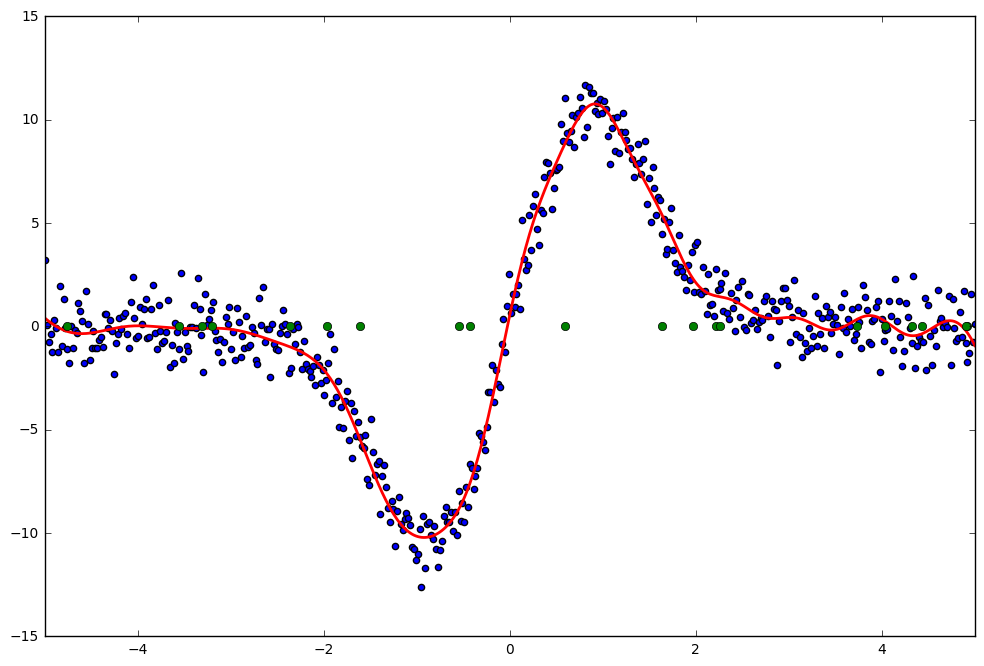

In [92]:
n = 500
     
#Define the bound of the focused interval    
lbound = -5
ubound = 5
    
x = mgrid[lbound:ubound:complex(0,n)].reshape(n, 1)
# set y and add random noise
    
y = 0.01*x+20*np.sin(x)*np.exp(-x**2/2)
y += random.normal(0, 1, y.shape)
     
#Initialize parameters of the radial basis function

#Specify Dimension of inputs and outputs
InputDimension = 1
OutputDimension = 1
    
#Number of Gaussian centers
numNeurons = 20

#Choose the centers randomly between -1 and 1
centers = [random.uniform(lbound, ubound, InputDimension) for i in range(numNeurons)]

#Define the size of the kernels 
beta = 2

#Define the initial weights between 0 and 1 for each center
W = random.random((numNeurons, OutputDimension))


######### Start RBF regression #############

#Train the neural network on the data x
L = trainrbf(x, y , beta, numNeurons)
z = testrbf(x, L[0], beta, numNeurons, L[1])
       
# plot original data
plt.figure(figsize=(12, 8))

for i in range(n):
    plt.scatter(x[i], y[i])
     
# plot learned model
plt.plot(x, z, 'r-', linewidth=2)
     
# plot rbfs
plt.plot(centers, zeros(numNeurons), 'go')
     
#for c in centers:
# RF prediction lines
    #Plot the interpolated line which corresponds to the mixture of gaussian lines
    #cx = arange(c-0.5, c+0.5, 0.01)
    #cy = [_radialbasisfunc(beta, array([cx_]), array([c])) for cx_ in cx]
    #plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
plt.xlim(-5, 5)
plt.show()

In [ ]:
def kmeans(x,k):
    n = x.shape[0]
    n_iterations = 1000
    epsilon = 1e-8
    err = np.inf

    #initialize random centroids
    c = np.zeros((k,2))
    for i in range(k):
        idx = np.random.randint(n)
        c[i] = x[idx,:]

    for iteration in range(n_iterations):
        d = np.zeros((n, k))  # distances to centroids square
        for i in range(k):
            d[:, i] = np.sqrt(np.sum(np.square(np.subtract(x, np.tile(c[i, :], (n, 1)))), 1).flatten())

        #assign each point to nearest centroid
        l = np.argmin(d,1)


        #recompute centroids as center of mass of each cluster
        for j in range(k):
            if len(l[l==j]):
                c[j,:] = x[l==j].sum(0) / len(l[l==j])

        err_new = np.sum(np.min(d,1))/n


        if np.abs(err_new - err)<epsilon:
            break
        err = err_new

    return c,l,err